**Task03-Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [ ]:
df=pd.read_csv('/content/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#Handling Missing Values in Numerical Columns
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#columns with their values -
cols=df.describe(include="O").columns
for i in cols:
    print("Distinct_values :\n 'column_name' =",i)
    print(df[i].unique())
    print("")

Distinct_values :
 'column_name' = Loan_ID
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP0012

**Segregating Numerical and Categorical Attributes**

In [ ]:
data_cat = df.select_dtypes('object')
data_num = df.select_dtypes(exclude='object')


data_cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [ ]:
data_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0


**EDA**

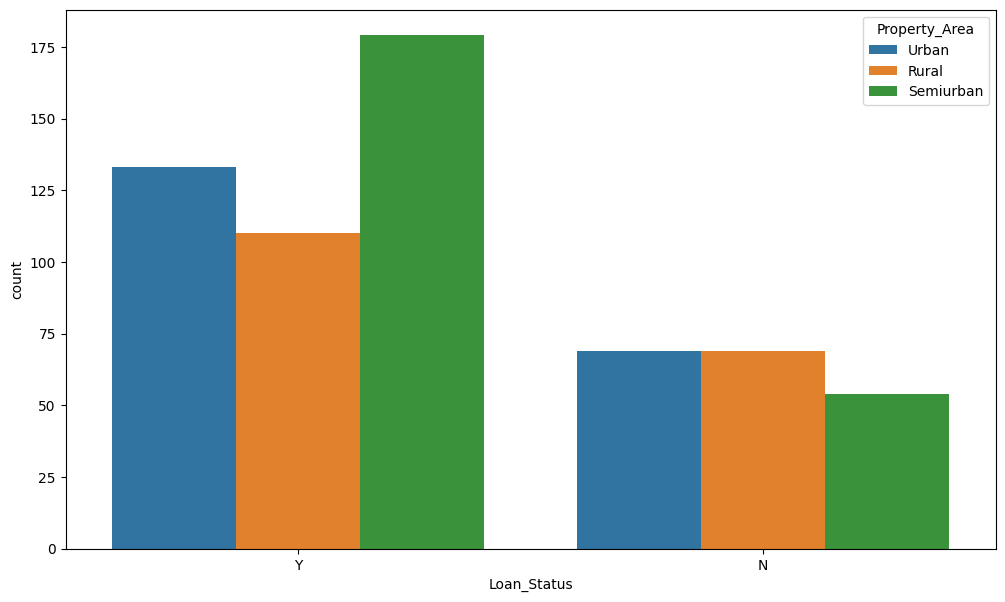

In [ ]:
#Loan Approval Count by Property Area
import seaborn as sns
plt.figure(figsize=(12 , 7))
sns.countplot(x='Loan_Status', hue='Property_Area', data=df)
plt.show()

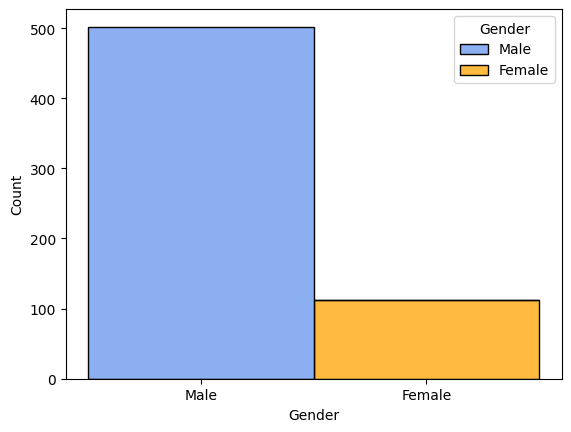

In [ ]:
# Plot histogram for gender distribution
sns.histplot(data=df, x='Gender', hue='Gender', multiple='stack', palette={'Male': 'cornflowerblue', 'Female': 'orange'}, discrete=True)
plt.show()

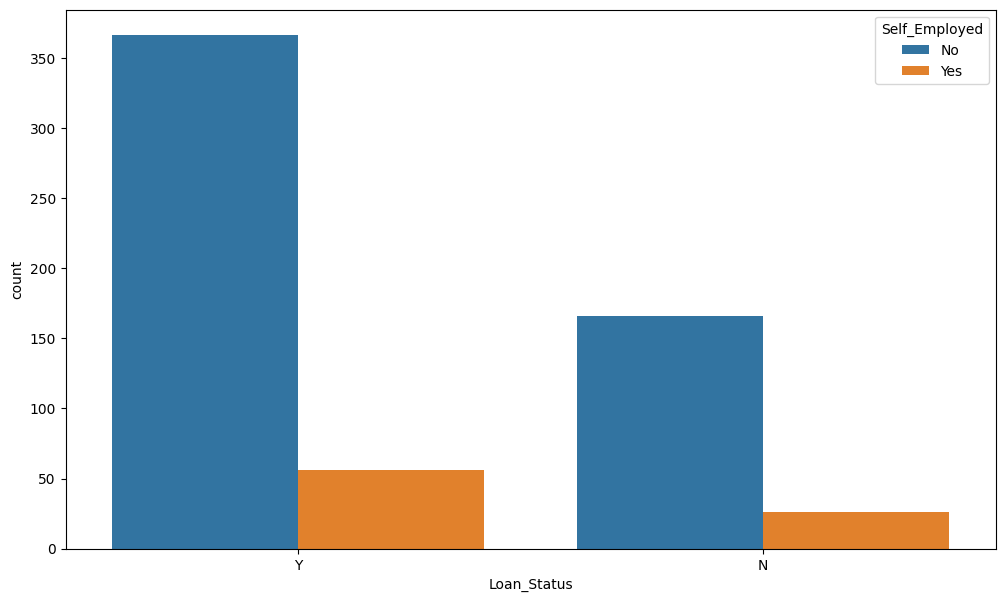

In [ ]:
plt.figure(figsize=(12 , 7))
sns.countplot(x='Loan_Status' , hue="Self_Employed", data=df)
plt.show()

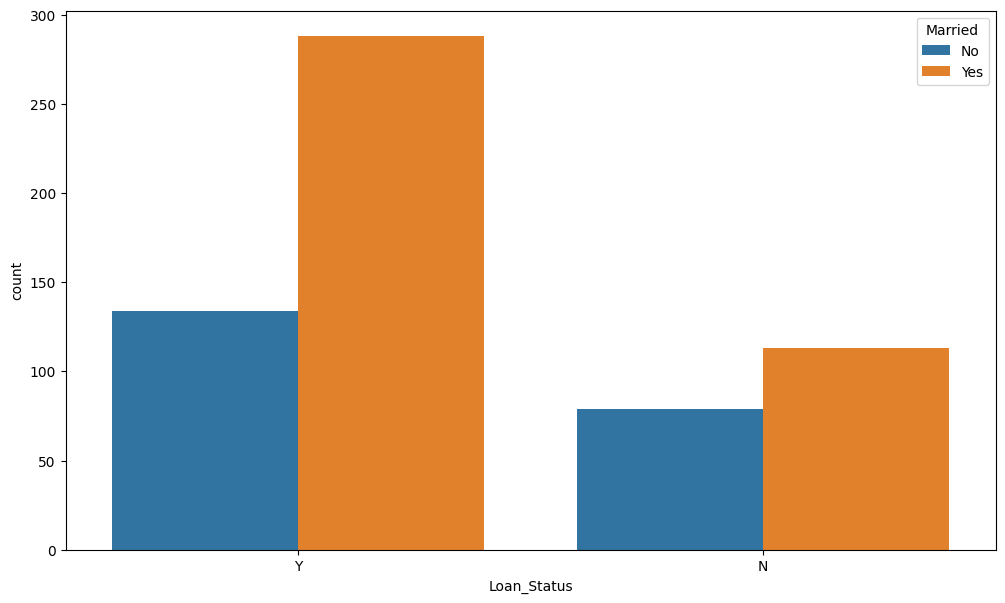

In [ ]:
plt.figure(figsize=(12 , 7))
sns.countplot(x='Loan_Status',hue='Married', data=df)
plt.show()

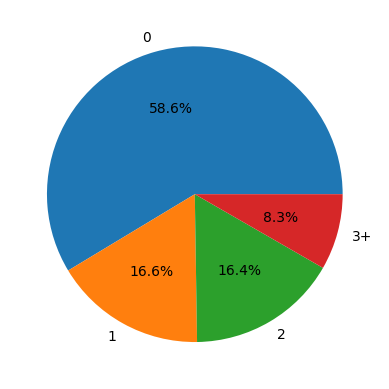

In [ ]:
#Distribution of Dependents
s=df['Dependents'].value_counts()/df['Dependents'].value_counts().sum()*100
plt.pie(s.values,labels=s.index,autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Education', ylabel='count'>

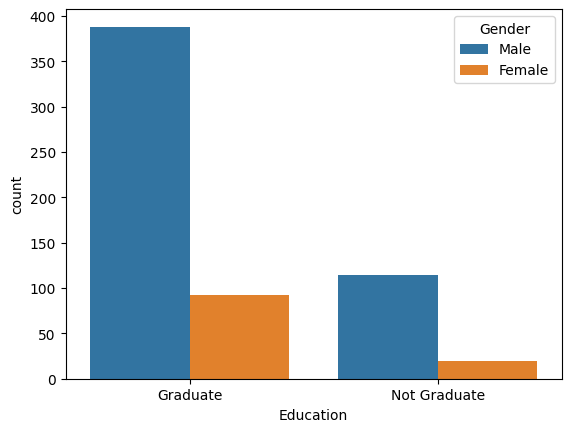

In [ ]:
sns.countplot(x='Education',hue='Gender',data=df)
# majority are Graduate

<ipython-input-93-52b980ce1c50>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

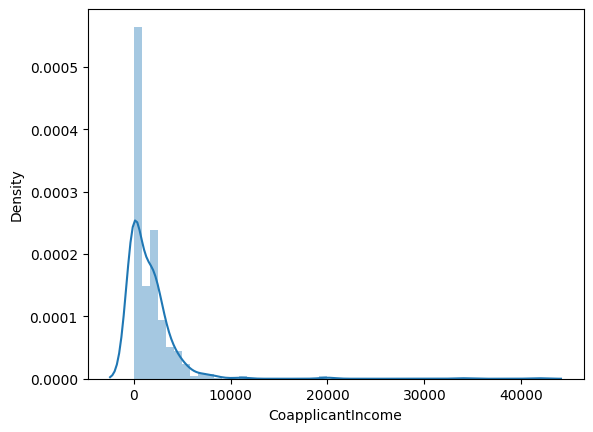

In [ ]:
# numerical data
sns.distplot(df['CoapplicantIncome'])

<ipython-input-94-4fe14db8f0cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

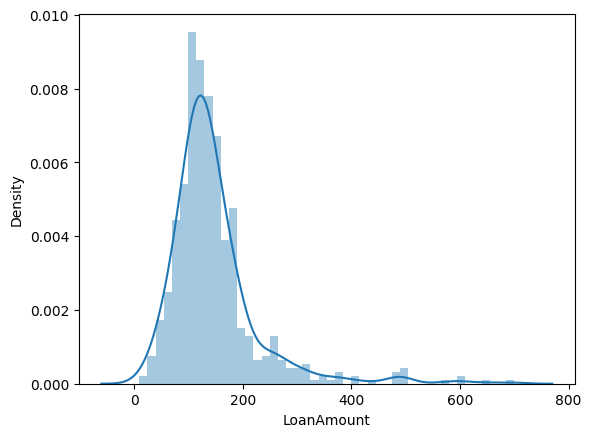

In [ ]:
sns.distplot(df['LoanAmount'])

In [ ]:
#created new column
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [ ]:
#log transformation
import numpy as np
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['ApplicantIncome'] = np.exp(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])
df['CoapplicantIncome'] = np.exp(df['CoapplicantIncome'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df['LoanAmount'] = np.log(df['LoanAmount'])
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
df['LoanAmountLog'] = np.log(df['LoanAmount'])
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
df['Total_Income_Log'] = np.log(df['Total_income'])
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,4.986426,5.886104,1.0,Urban,Y,5849.0,8.674026,-inf,1.606719,1.772594,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,4.852030,5.886104,1.0,Rural,N,6091.0,8.430109,7.318540,1.579397,1.772594,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,4.189655,5.886104,1.0,Urban,Y,3000.0,8.006368,-inf,1.432618,1.772594,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,4.787492,5.886104,1.0,Urban,Y,4941.0,7.856707,7.765569,1.566007,1.772594,8.505323
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,4.948760,5.886104,1.0,Urban,Y,6000.0,8.699515,-inf,1.599137,1.772594,8.699515


In [ ]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_income', 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns = cols, axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,1.606719,1.772594,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,1.579397,1.772594,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,1.432618,1.772594,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,1.566007,1.772594,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,1.599137,1.772594,8.699515


<ipython-input-99-b9405fbb15d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

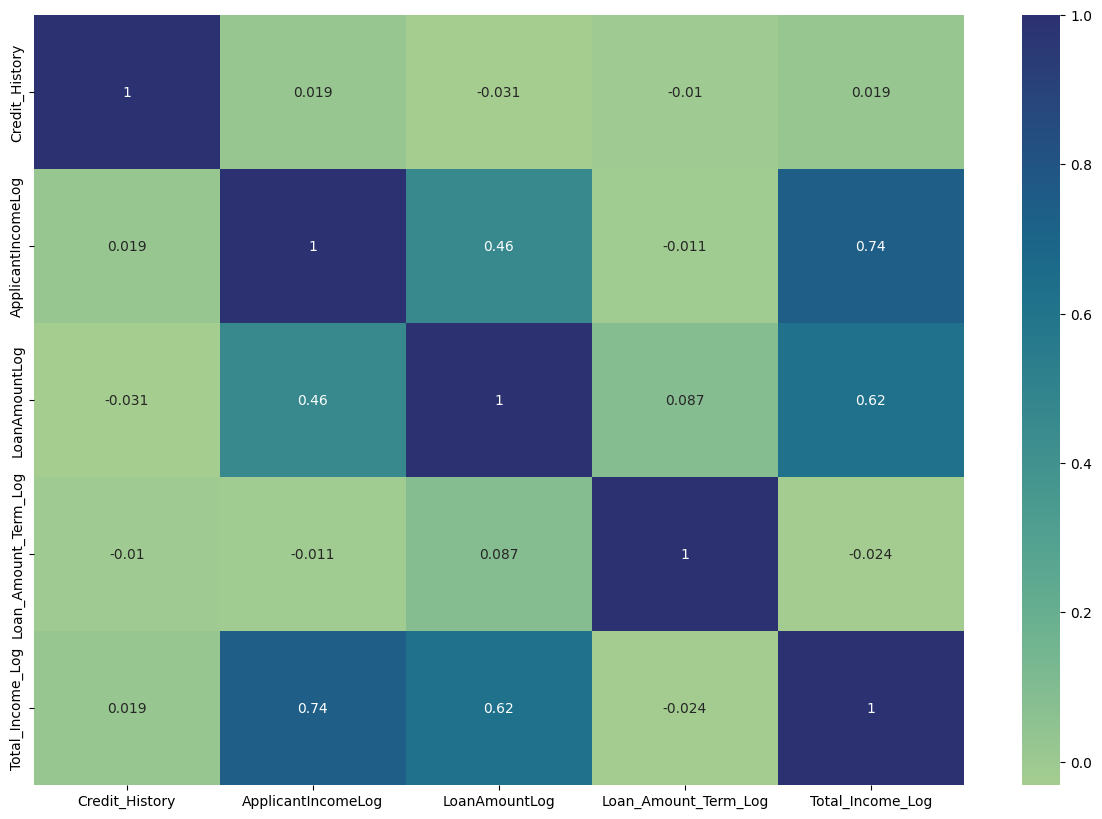

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap = 'crest',)

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,1.606719,1.772594,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,1.579397,1.772594,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,1.432618,1.772594,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,1.566007,1.772594,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,1.599137,1.772594,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y,7.972466,1.449898,1.772594,7.972466
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y,8.320205,1.305323,1.647303,8.320205
611,Male,Yes,1,Graduate,No,1.0,Urban,Y,8.996157,1.710801,1.772594,9.025456
612,Male,Yes,2,Graduate,No,1.0,Urban,Y,8.933664,1.654623,1.772594,8.933664


In [ ]:
#handling categorical data
d1 = pd.get_dummies(df['Gender'], drop_first= True)
d2 = pd.get_dummies(df['Married'], drop_first= True)
d3 = pd.get_dummies(df['Dependents'], drop_first= True)
d4 = pd.get_dummies(df['Education'], drop_first= True)
d5 = pd.get_dummies(df['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(df['Property_Area'], drop_first= True)



df1 = pd.concat([df, d1, d2, d3, d4, d5, d6], axis = 1)
df=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
df = df.drop(columns=cols, axis=1)
df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,8.674026,1.606719,1.772594,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430109,1.579397,1.772594,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006368,1.432618,1.772594,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.856707,1.566007,1.772594,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699515,1.599137,1.772594,8.699515,1,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Credit_History        614 non-null    float64
 1   Loan_Status           614 non-null    object 
 2   ApplicantIncomeLog    614 non-null    float64
 3   LoanAmountLog         614 non-null    float64
 4   Loan_Amount_Term_Log  614 non-null    float64
 5   Total_Income_Log      614 non-null    float64
 6   Male                  614 non-null    uint8  
 7   Yes                   614 non-null    uint8  
 8   1                     614 non-null    uint8  
 9   2                     614 non-null    uint8  
 10  3+                    614 non-null    uint8  
 11  Not Graduate          614 non-null    uint8  
 12  Yes                   614 non-null    uint8  
 13  Semiurban             614 non-null    uint8  
 14  Urban                 614 non-null    uint8  
dtypes: float64(5), object(1

In [ ]:

# specify input and output attributes
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
x

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,8.674026,1.606719,1.772594,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,8.430109,1.579397,1.772594,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,8.006368,1.432618,1.772594,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,7.856707,1.566007,1.772594,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,8.699515,1.599137,1.772594,8.699515,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,7.972466,1.449898,1.772594,7.972466,0,0,0,0,0,0,0,0,0
610,1.0,8.320205,1.305323,1.647303,8.320205,1,1,0,0,1,0,0,0,0
611,1.0,8.996157,1.710801,1.772594,9.025456,1,1,1,0,0,0,0,0,1
612,1.0,8.933664,1.654623,1.772594,8.933664,1,1,0,1,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("Accuracy is", model.score(x_test, y_test)*100)

Accuracy is 69.48051948051948


In [ ]:
# Predict the target values on the test set
y_pred = model.predict(x_test)
y_pred

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report
# Print a classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           N       0.57      0.52      0.54        54
           Y       0.75      0.79      0.77       100

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



In [ ]:
from sklearn.metrics import confusion_matrix
# Convert feature names to strings in x_test if they are not already
#x_test.columns = x_test.columns.astype(str)
# Proceed with predicting and printing the confusion matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[28 26]
 [21 79]]


<Axes: >

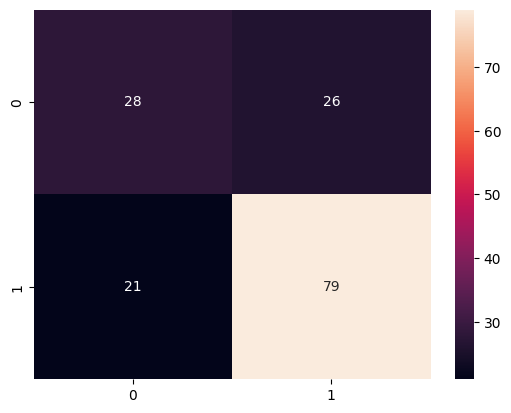

In [ ]:
sns.heatmap(cm, annot=True)